# Bitter's PO's July 2021 - January 2023

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('bitter_po_july2021-january2023 - sheet 1.csv')
df.fillna(0, inplace=True)

In [3]:
df.head()

,po date,customer,STUSPS,po number,total cases,aromatic bourbon,cardamom,cassia,clove,ginger,lemon pepper,sassafras,szechuan,tres amigos,gracia mole,tropical tiki
0,7/6/2021,Aleph (SC),SC,6302103,19,2.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,4.0,2.0
1,7/6/2021,Aleph (SC),SC,6302103,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,7/6/2021,Johnson Bros FL (FL),FL,TP-0049405,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,7/7/2021,Mexcor (TX),TX,100155,110,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,7/8/2021,TJ Sheehan (NY),NY,ISTJS0721B,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Case sales grouped by state

In [4]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go

In [5]:
init_notebook_mode(connected=True)

In [6]:
cases_by_state = df.groupby('STUSPS', as_index=False).sum()

In [7]:
cases_by_state

,STUSPS,total cases,aromatic bourbon,cardamom,cassia,clove,ginger,lemon pepper,sassafras,szechuan,tres amigos,gracia mole,tropical tiki
0,AZ,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
1,CA,89,8.0,9.0,1.0,1.0,1.0,0.0,4.0,9.0,42.0,11.0,3.0
2,CO,71,0.0,7.0,1.0,14.0,16.0,0.0,5.0,0.0,28.0,0.0,0.0
3,CT,45,4.0,3.0,4.0,4.0,6.0,2.0,4.0,2.0,14.0,6.0,0.0
4,FL,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
5,GA,28,3.0,3.0,3.0,7.0,3.0,0.0,3.0,0.0,7.0,0.0,0.0
6,KS,10,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,MA,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8,MD,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,MN,7,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
data = dict(type = 'choropleth', 
            locations = cases_by_state['STUSPS'], 
            locationmode = 'USA-states', 
            z = cases_by_state['total cases'], 
            text = 'Aromatic Bourbon: '+cases_by_state['aromatic bourbon'].astype(str)
                    +'<br>Cardamom: '+cases_by_state['cardamom'].astype(str)
                    +'<br>Cassia: '+cases_by_state['cassia'].astype(str)
                    +'<br>Clove: '+cases_by_state['clove'].astype(str)
                    +'<br>Ginger: '+cases_by_state['ginger'].astype(str)
                    +'<br>Lemon Pepper: '+cases_by_state['lemon pepper'].astype(str)
                    +'<br>Sassafras: '+cases_by_state['sassafras'].astype(str)
                    +'<br>Tres Amigos: '+cases_by_state['tres amigos'].astype(str)
                    +'<br>Gracia Mole: '+cases_by_state['gracia mole'].astype(str)
                    +'<br>Tropical Tiki: '+cases_by_state['tropical tiki'].astype(str),
            colorscale = 'Greens',
            colorbar = {'title':'Cases'})

In [76]:
layout = dict(title="Cases and SKU's by state",geo=dict(scope='usa',showlakes=True,lakecolor='rgb(0,191,255)'))       

In [77]:
choromap = go.Figure(data=[data],layout=layout)

In [78]:
iplot(choromap)

#### The majority of p.o.'s originate from California, Nevada, and New York. Texas was an outlier due to Mexcor placing a single 110 case order on July 7, 2021

## Cases sold grouped by SKU

In [12]:
bitter_only = df.drop(['total cases','STUSPS','po date','customer','po number'],axis=1)

In [13]:
bitter_sum = bitter_only.sum(numeric_only=True)

Text(0, 0.5, 'Cases')

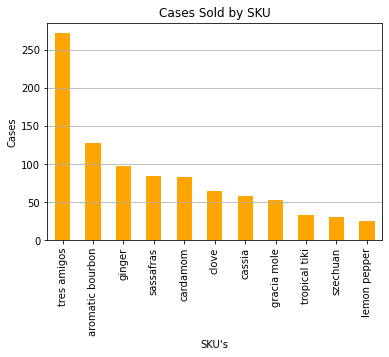

In [14]:
bitter_sum.sort_values(ascending=False).plot(title='Cases Sold by SKU',color='orange',kind='bar').grid(axis='y')
plt.xlabel("SKU's")
plt.ylabel('Cases')

#### Tres Amigos continues to be the best seller.

## Total cases sold by month

In [15]:
df['po date'] = pd.to_datetime(df['po date'], dayfirst=False)

In [16]:
df['month'] = df['po date'].dt.month

In [17]:
by_month = df.groupby('month',as_index=False).sum()

In [18]:
by_month

,month,total cases,aromatic bourbon,cardamom,cassia,clove,ginger,lemon pepper,sassafras,szechuan,tres amigos,gracia mole,tropical tiki
0,1,43,5.0,1.0,3.0,2.0,7.0,3.0,10.0,0.0,12.0,0.0,0.0
1,2,46,18.0,7.0,2.0,3.0,1.0,0.0,0.0,0.0,10.0,3.0,2.0
2,3,38,8.0,8.0,2.0,4.0,7.0,0.0,1.0,1.0,6.0,1.0,0.0
3,4,49,5.0,7.0,5.0,4.0,3.0,0.0,14.0,0.0,11.0,0.0,0.0
4,5,42,10.0,5.0,4.0,1.0,9.0,0.0,1.0,0.0,12.0,0.0,0.0
5,6,37,4.0,2.0,1.0,0.0,0.0,0.0,3.0,2.0,25.0,0.0,0.0
6,7,221,27.0,15.0,16.0,11.0,20.0,13.0,21.0,12.0,50.0,19.0,20.0
7,8,63,8.0,8.0,3.0,2.0,3.0,1.0,4.0,2.0,32.0,0.0,0.0
8,9,38,0.0,1.0,5.0,1.0,11.0,0.0,7.0,0.0,9.0,4.0,0.0
9,10,116,7.0,9.0,10.0,13.0,6.0,2.0,9.0,9.0,40.0,8.0,4.0


Text(0.5, 1.0, 'Sales by Month')

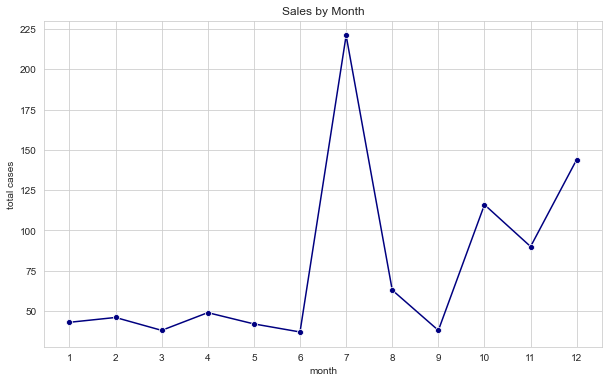

In [19]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.xticks(range(1,13))

sns.lineplot(x='month',y='total cases',marker='o',color='navy',data=by_month).set_title('Sales by Month')

#### sales has a slight upward trend through the year with the month of July having a significant increase of sales. Mexcor(TX) has also skewed the data upward for that month.

#### Removing the one off p.o. by mexcor(TX) 

In [20]:
i = df[df['STUSPS']=='TX'].index

In [21]:
no_tx = df.drop(i)

In [22]:
no_tx['po date'] = pd.to_datetime(no_tx['po date'], dayfirst=False)
no_tx['month'] = no_tx['po date'].dt.month
by_month_no_tx = no_tx.groupby('month',as_index=False).sum()

In [23]:
by_month_no_tx

,month,total cases,aromatic bourbon,cardamom,cassia,clove,ginger,lemon pepper,sassafras,szechuan,tres amigos,gracia mole,tropical tiki
0,1,43,5.0,1.0,3.0,2.0,7.0,3.0,10.0,0.0,12.0,0.0,0.0
1,2,46,18.0,7.0,2.0,3.0,1.0,0.0,0.0,0.0,10.0,3.0,2.0
2,3,38,8.0,8.0,2.0,4.0,7.0,0.0,1.0,1.0,6.0,1.0,0.0
3,4,49,5.0,7.0,5.0,4.0,3.0,0.0,14.0,0.0,11.0,0.0,0.0
4,5,42,10.0,5.0,4.0,1.0,9.0,0.0,1.0,0.0,12.0,0.0,0.0
5,6,37,4.0,2.0,1.0,0.0,0.0,0.0,3.0,2.0,25.0,0.0,0.0
6,7,111,17.0,5.0,6.0,1.0,10.0,3.0,11.0,2.0,40.0,9.0,10.0
7,8,63,8.0,8.0,3.0,2.0,3.0,1.0,4.0,2.0,32.0,0.0,0.0
8,9,38,0.0,1.0,5.0,1.0,11.0,0.0,7.0,0.0,9.0,4.0,0.0
9,10,116,7.0,9.0,10.0,13.0,6.0,2.0,9.0,9.0,40.0,8.0,4.0


Text(0.5, 1.0, 'Sales by Month')

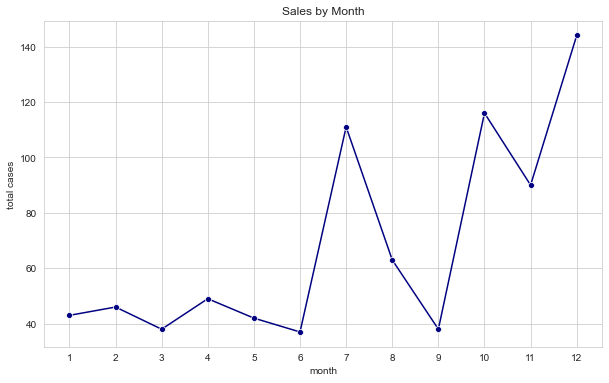

In [24]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,13))

sns.lineplot(x='month',y='total cases',marker='o',color='navy',data=by_month_no_tx).set_title('Sales by Month')

#### With the Mexcor(TX) P.O. removed July still has a 200% increase over June followed by a decline in September and August. The next few months we saw a substantial increase for the holiday season.

## Total cases sold annually
**Note: For the year of 2021 we only started to record individual sku's starting in July. Anything prior we only have total cases sold. Approximately 400 cases needs to be added to the total count for 2021.**

In [26]:
df['year'] = df['po date'].dt.year

In [65]:
by_year = df.drop(['month'],axis=1).groupby('year',as_index=False)[['total cases']].sum()

In [72]:
# Adding in the missing 400 cases to year 2021
by_year.iloc[0,1] = by_year.iloc[0,1] + 400

In [73]:
by_year

,year,total cases
0,2021,849
1,2022,465
2,2023,13


Text(0.5, 1.0, 'Total Cases Sold Annually')

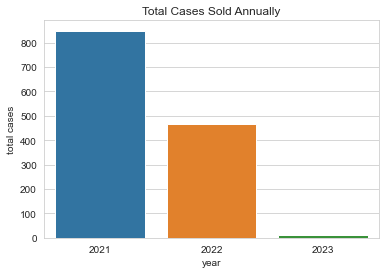

In [75]:
sns.barplot(data=by_year, x='year', y='total cases').set_title('Total Cases Sold Annually')

**We see approximately a 45% decrease from 2021 to 2022. Disregard 2023 as it only contains PO's of the first couple weeks in January.**